In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('electric_vehicles_spec_2025.csv')

In [3]:
df.shape

(478, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [5]:
numerical_data = [column for column in df.columns if df[column].dtype != 'O']
categorical_data = [column for column in df.columns if df[column].dtype == 'O']
print(categorical_data)
print(numerical_data)

['brand', 'model', 'battery_type', 'fast_charge_port', 'cargo_volume_l', 'drivetrain', 'segment', 'car_body_type', 'source_url']
['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm', 'width_mm', 'height_mm']


In [6]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [7]:
df.describe(include = 'object')

,brand,model,battery_type,fast_charge_port,cargo_volume_l,drivetrain,segment,car_body_type,source_url
count,478,477,478,477,477,478,478,478,478
unique,59,477,1,2,140,3,15,8,478
top,Mercedes-Benz,X Privilege AWD (MY25),Lithium-ion,CCS,520,AWD,JC - Medium,SUV,https://ev-database.org/car/3178/firefly-firefly
freq,42,1,478,476,17,191,91,244,1


In [8]:
print(df['battery_type'].value_counts())
df['fast_charge_port'].value_counts()

battery_type
Lithium-ion    478
Name: count, dtype: int64


fast_charge_port
CCS        476
CHAdeMO      1
Name: count, dtype: int64

In [9]:
df.drop(['source_url','battery_type','fast_charge_port'], axis = 1, inplace = True)

In [10]:
df['cargo_volume_l'] = pd.to_numeric(df['cargo_volume_l'],errors = 'coerce')

In [11]:
df.isna().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
towing_capacity_kg            26
cargo_volume_l                 4
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
473    False
474    False
475    False
476    False
477    False
Length: 478, dtype: bool

In [13]:
df.shape

(478, 19)

In [14]:
new_df = df.dropna(subset = ['model','torque_nm','model','fast_charging_power_kw_dc','towing_capacity_kg','cargo_volume_l'])
new_df.shape

(439, 19)

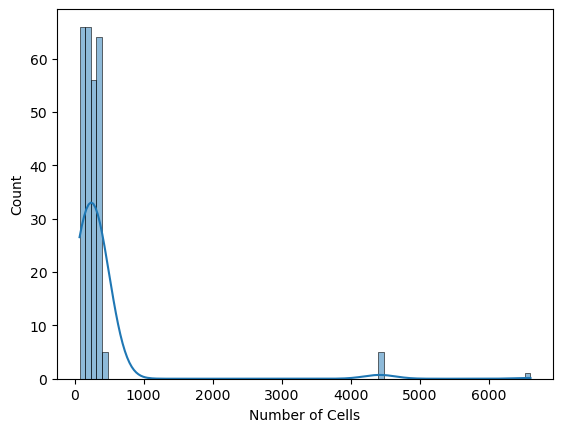

In [15]:
sns.histplot(data = new_df, x = 'number_of_cells', kde = True, bins = 80)
plt.xlabel('Number of Cells')
plt.show()

In [16]:
new_df['number_of_cells'] = new_df['number_of_cells'].fillna(new_df['number_of_cells'].median())
new_df.isnull().sum()

brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
dtype: int64

In [17]:
brand_count = new_df['brand'].value_counts()
drivetrain_count = new_df['drivetrain'].value_counts()
segment_count = new_df['segment'].value_counts()
car_body_type_count = new_df['car_body_type'].value_counts()

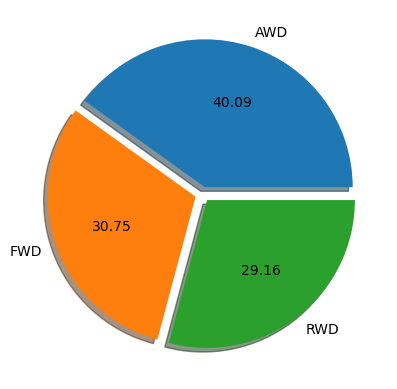

In [18]:
plt.pie(drivetrain_count, labels = drivetrain_count.index, autopct = "%1.2f", explode = [0.05,0.05,0.05], shadow = True)
plt.show()

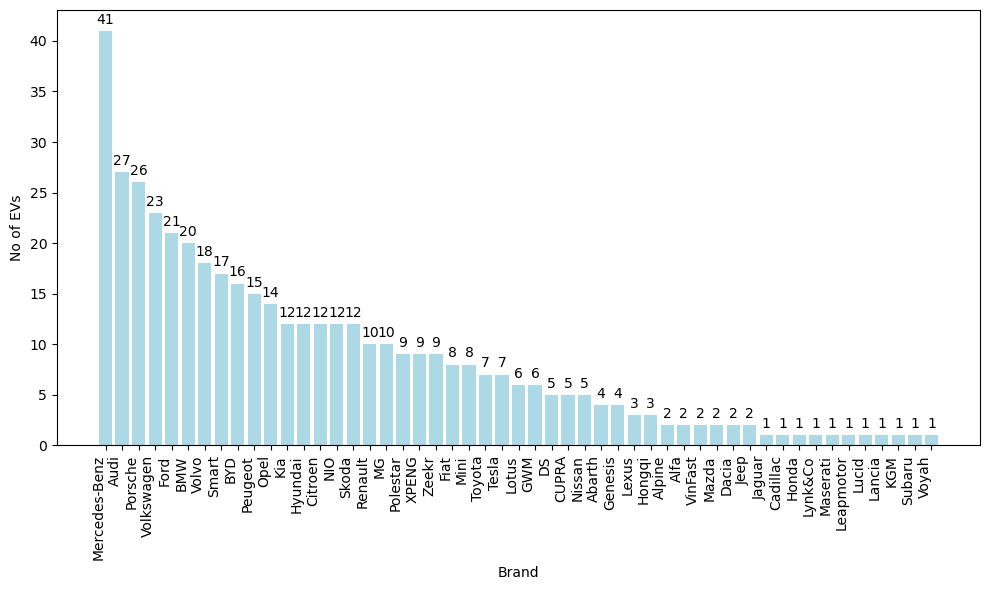

In [59]:
fig, ax = plt.subplots(figsize = (10,6)) 
bars = ax.bar(brand_count.index, brand_count, align = 'center',color = 'lightblue')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Brand')
plt.ylabel('No of EVs')
plt.tight_layout()
ax.bar_label(bars, padding=3)
plt.show()

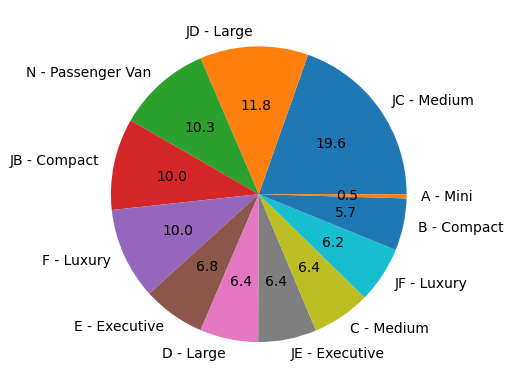

In [20]:
plt.pie(segment_count, labels = segment_count.index, autopct = "%1.1f")
plt.show()

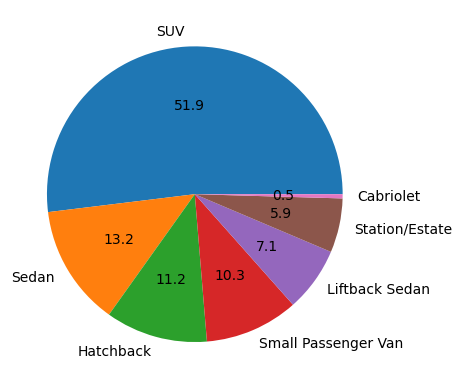

In [21]:
plt.pie(car_body_type_count, labels = car_body_type_count.index, autopct = "%1.1f")
plt.show()

In [22]:
awd_top_speed = new_df[new_df['drivetrain'] == 'AWD']['top_speed_kmh']
rwd_top_speed = new_df[new_df['drivetrain'] == 'RWD']['top_speed_kmh']
fwd_top_speed = new_df[new_df['drivetrain'] == 'FWD']['top_speed_kmh']
awd_range = new_df[new_df['drivetrain'] == 'AWD']['range_km']
rwd_range = new_df[new_df['drivetrain'] == 'RWD']['range_km']
fwd_range = new_df[new_df['drivetrain'] == 'FWD']['range_km']

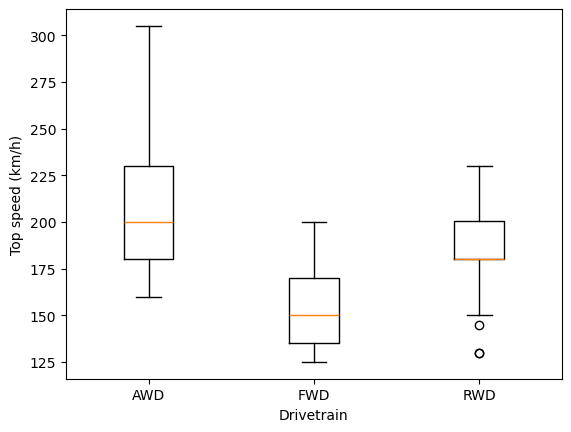

In [23]:
plt.boxplot([awd_top_speed, fwd_top_speed, rwd_top_speed], tick_labels = ['AWD','FWD','RWD'])
plt.xlabel('Drivetrain')
plt.ylabel('Top speed (km/h)')
plt.show()

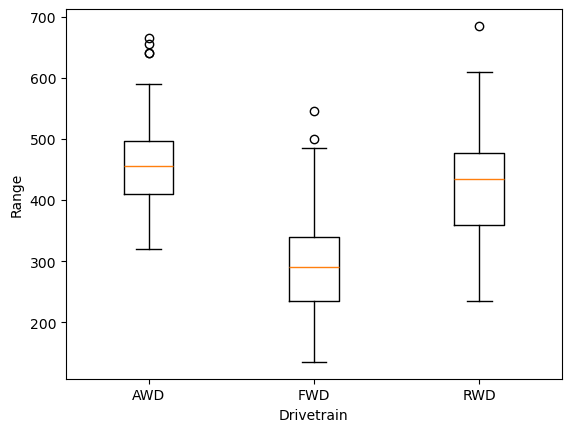

In [24]:
plt.boxplot([awd_range, fwd_range, rwd_range], tick_labels = ['AWD','FWD','RWD'])
plt.xlabel('Drivetrain')
plt.ylabel('Range')
plt.show()

In [25]:
new_df['volume_m'] = (new_df['length_mm'] * new_df['height_mm'] * new_df['width_mm'])/(1000*1000*1000)
new_df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,volume_m
0,Abarth,500e Convertible,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185.0,4,FWD,B - Compact,3673,1683,1518,Hatchback,9.383758
1,Abarth,500e Hatchback,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185.0,4,FWD,B - Compact,3673,1683,1518,Hatchback,9.383758
2,Abarth,600e Scorpionissima,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360.0,5,FWD,JB - Compact,4187,1779,1557,SUV,11.597584
3,Abarth,600e Turismo,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360.0,5,FWD,JB - Compact,4187,1779,1557,SUV,11.597584
6,Alfa,Romeo Junior Elettrica 54 kWh,150,50.8,102.0,260.0,128,320,9.0,85.0,0.0,400.0,5,FWD,JB - Compact,4173,1781,1532,SUV,11.385997


In [26]:
new_df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,length_mm,width_mm,height_mm,volume_m
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,185.277904,74.382460,293.152620,501.685649,163.494305,394.134396,6.859453,127.052392,1051.189066,500.526196,5.291572,4683.510251,1887.799544,1604.751708,14.258113
std,32.670840,20.168278,543.411217,234.784719,34.814372,103.103343,2.697664,58.681514,732.267501,189.553172,0.993907,363.457313,71.105754,130.234141,2.215676
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,185.000000,2.000000,3631.000000,1622.000000,1378.000000,9.098122
25%,160.000000,60.000000,204.000000,310.000000,143.000000,322.500000,4.800000,80.000000,500.000000,385.500000,5.000000,4447.500000,1849.000000,1516.000000,12.882447
50%,180.000000,77.000000,216.000000,440.000000,155.000000,400.000000,6.500000,115.000000,1000.000000,480.000000,5.000000,4720.000000,1890.000000,1600.000000,13.964404
75%,201.000000,90.600000,288.000000,679.000000,177.500000,470.000000,8.200000,150.000000,1600.000000,549.500000,5.000000,4961.000000,1939.000000,1665.000000,15.360055
max,305.000000,118.000000,6600.000000,1340.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,1410.000000,9.000000,5908.000000,2019.000000,1986.000000,23.135970


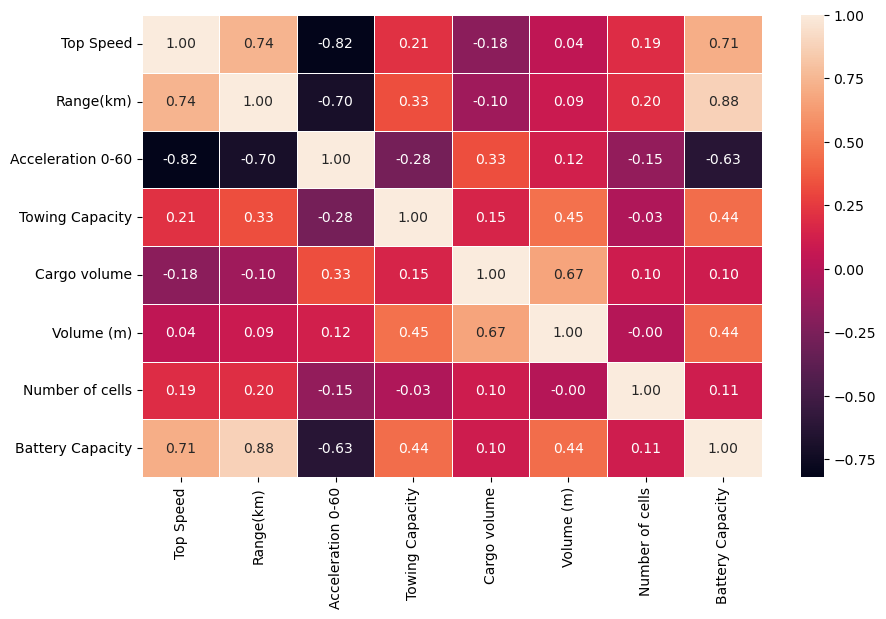

In [27]:
top_speed = new_df['top_speed_kmh'].values
range_km = new_df['range_km'].values
acceleration = new_df['acceleration_0_100_s'].values
towing_capacity = new_df['towing_capacity_kg'].values
cargo_volume = new_df['cargo_volume_l'].values
volume = new_df['volume_m'].values
number_of_cells = new_df['number_of_cells'].values
battery_capacity_kWh = new_df['battery_capacity_kWh'].values
info = {
    'Top Speed':top_speed,
    'Range(km)':range_km,
    'Acceleration 0-60':acceleration,
    'Towing Capacity':towing_capacity,
    'Cargo volume':cargo_volume,
    'Volume (m)':volume,
    'Number of cells':number_of_cells,
    'Battery Capacity':battery_capacity_kWh,
}
data = pd.DataFrame(info)
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,fmt='.2f',linewidths=0.5)
plt.show()

In [29]:
numerical_data = [column for column in df.columns if df[column].dtype != 'O']
categorical_data = [column for column in df.columns if df[column].dtype == 'O']
print(categorical_data)
print(numerical_data)

['brand', 'model', 'drivetrain', 'segment', 'car_body_type']
['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'towing_capacity_kg', 'cargo_volume_l', 'seats', 'length_mm', 'width_mm', 'height_mm']


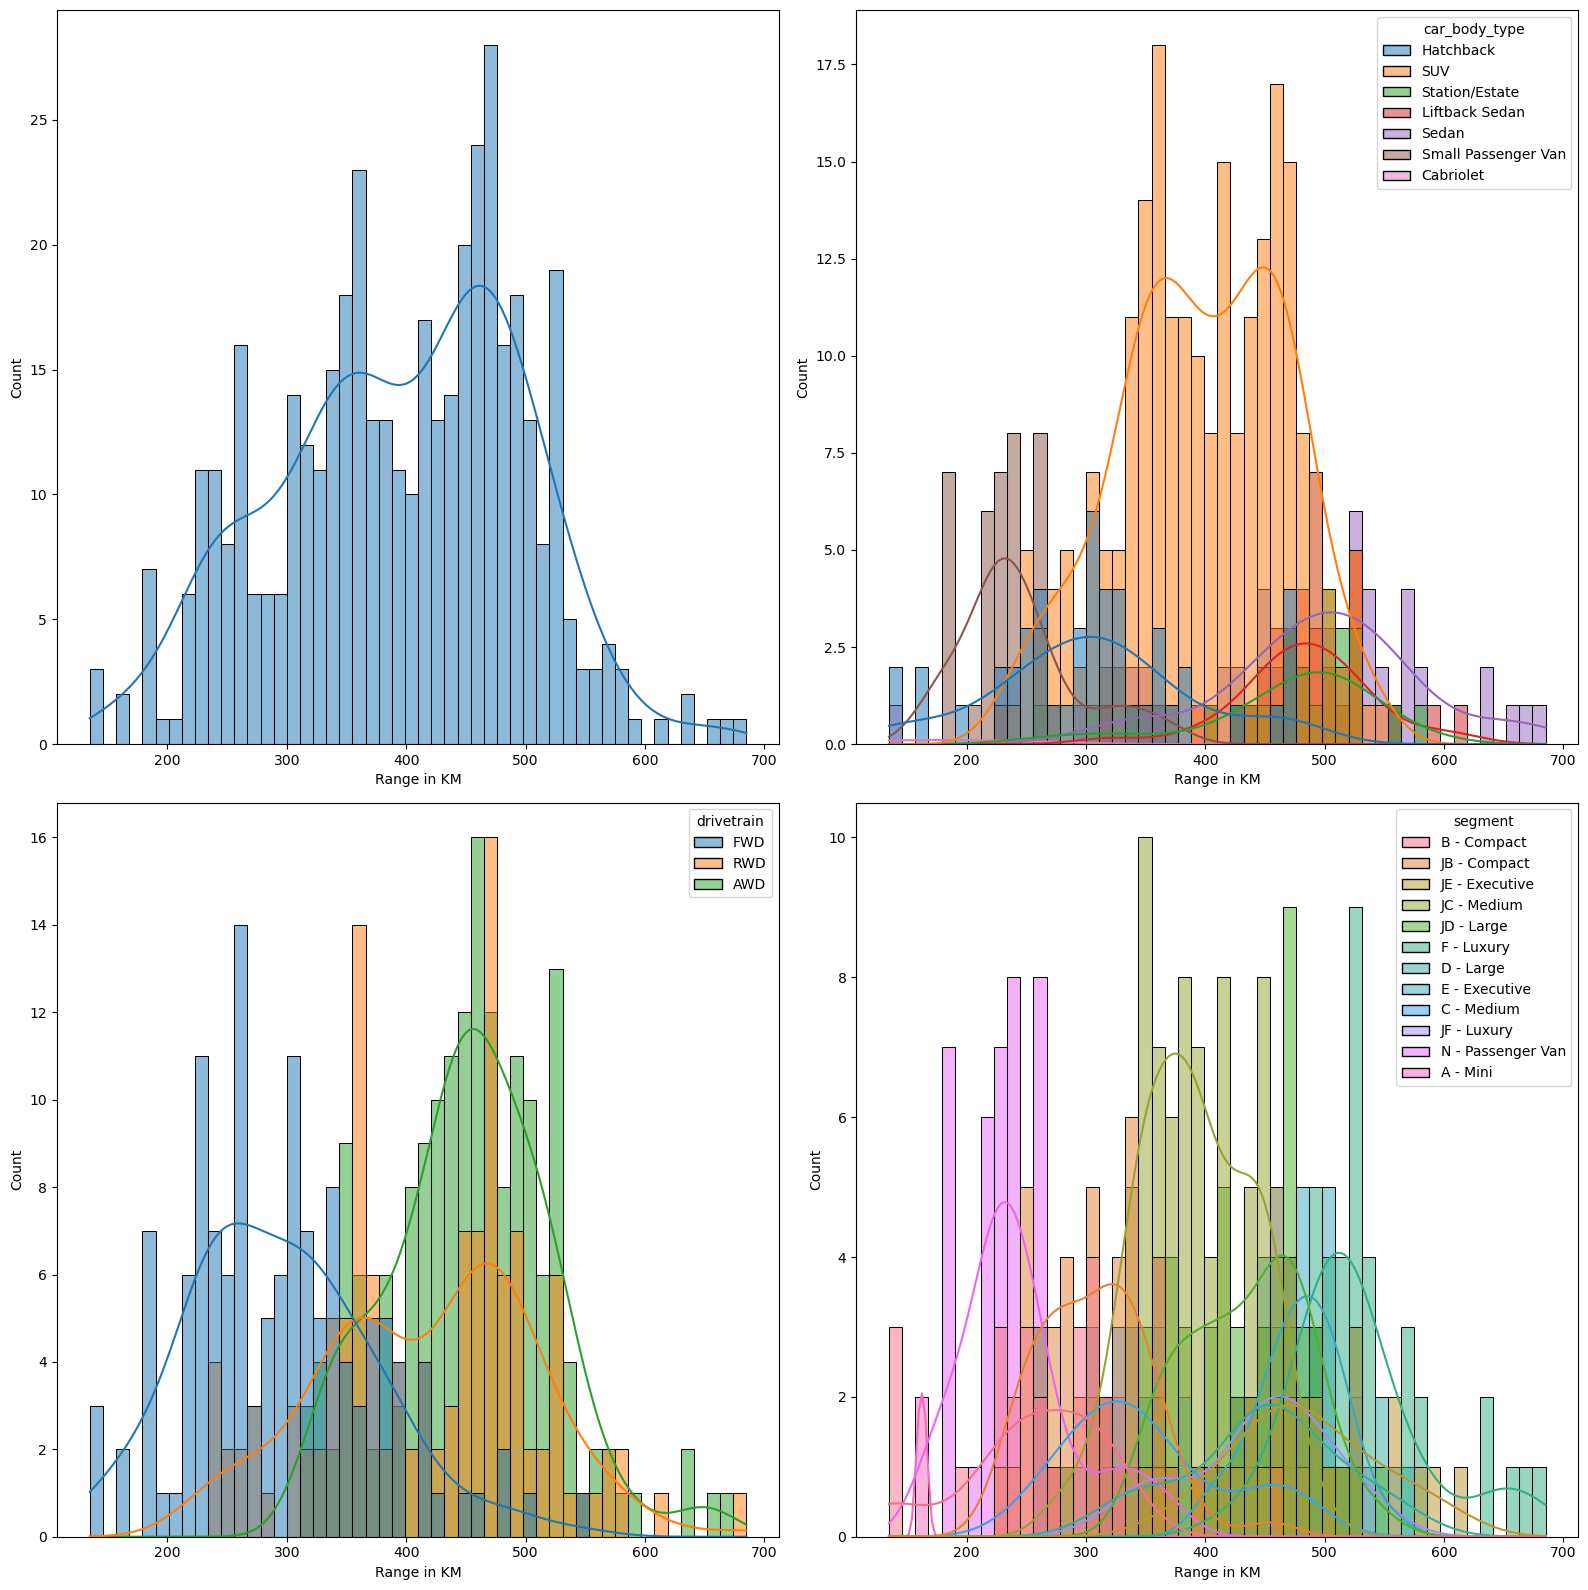

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(data=new_df, x='range_km', bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Range in KM')
sns.histplot(data=new_df, x='range_km', bins=50, kde=True, hue='car_body_type', ax=axes[0, 1])
axes[0, 1].set_xlabel('Range in KM')
sns.histplot(data=new_df, x='range_km', bins=50, kde=True, hue='drivetrain', ax=axes[1, 0])
axes[1, 0].set_xlabel('Range in KM')
sns.histplot(data=new_df, x='range_km', bins=50, kde=True, hue='segment', ax=axes[1, 1])
axes[1, 1].set_xlabel('Range in KM')

plt.tight_layout()
plt.show()